#### Import Library

In [1]:
import os
import re
import sys
import nltk
import html
import time
import random
import zipfile
import requests
import dateparser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.svm import SVC
from textblob import TextBlob
from selenium import webdriver
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud, STOPWORDS
from selenium.webdriver.common.by import By
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import TreebankWordTokenizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from textblob.classifiers import NaiveBayesClassifier
from nltk.sentiment import SentimentIntensityAnalyzer
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report, accuracy_score, confusion_matrix

### Scraping

In [2]:
# options = Options()
# options.add_argument("--headless")  
# options.add_argument("--disable-gpu")
# options.add_argument("--no-sandbox")
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# # URL Google Maps dari tempat yang ingin diambil review-nya
# maps_url = "https://www.google.com/maps/place/KPP+Pratama+Surabaya+Gubeng/@-7.267915,112.750907,15z/data=!4m18!1m9!3m8!1s0x2dd7fbd9782615db:0x7fb2e62822c846dc!2sKPP+Pratama+Surabaya+Gubeng!8m2!3d-7.267915!4d112.750907!9m1!1b1!16s%2Fg%2F1hc74n3wf!3m7!1s0x2dd7fbd9782615db:0x7fb2e62822c846dc!8m2!3d-7.267915!4d112.750907!9m1!1b1!16s%2Fg%2F1hc74n3wf?entry=ttu&g_ep=EgoyMDI1MDIwMi4wIKXMDSoASAFQAw%3D%3D"
# driver.get(maps_url)
# time.sleep(5)  

# scrollable_div = driver.find_element(By.CLASS_NAME, "m6QErb.DxyBCb.kA9KIf.dS8AEf.XiKgde")
# num_scrolls = 200  
# for _ in range(num_scrolls):
#     driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scrollable_div)
#     time.sleep(2)  
# reviews = driver.find_elements(By.CLASS_NAME, "jJc9Ad")

# data = []
# for review in reviews:
#     try:
#         username = review.find_element(By.CLASS_NAME, "d4r55").text
#         rating = review.find_element(By.CLASS_NAME, "kvMYJc").get_attribute("aria-label")
#         raw_date = review.find_element(By.CLASS_NAME, "rsqaWe").text
#         parsed_date = dateparser.parse(raw_date).strftime("%Y-%m-%d") if raw_date else "Unknown"

#         try:
#             review_text = review.find_element(By.CLASS_NAME, "wiI7pd").text
#         except:
#             review_text = "-"

#         data.append({"Username": username, "Date": parsed_date, "Rating": rating, "Review": review_text})
#     except Exception as e:
#         print(f"Error: {e}")
#         continue

# df = pd.DataFrame(data)
# df.to_csv("reviews.csv", index=False, encoding="utf-8")
# print("Scraping selesai! Data disimpan di reviews.csv")
# driver.quit()

In [3]:
import zipfile

with zipfile.ZipFile('DATA.zip', 'w') as zipf:
    zipf.write('reviews.csv')
    zipf.write('gsheet.csv')
    zipf.write('data_gsheet.csv')
    zipf.write('REVIEW.csv')
    zipf.write('kamuskatabaku.xlsx')

In [4]:
with zipfile.ZipFile('DATA.zip', 'r') as zipf:
    zipf.extractall()

In [5]:
dataset = pd.read_csv('reviews.csv')
dataset 

,Username,Date,Rating,Review
0,Anggara Sidjabat,2025-03-27,5 bintang,...dtg kesini untuk ngurus coretax milik bapak...
1,Bang Pu'ad,2025-02-27,5 bintang,Pelayanan ramah langsung diberi arahan yg tepa...
2,dimas bayu,2025-02-27,1 bintang,Baru pertama kesini udah langsung punya kesan ...
3,Shanditya Mariana,2024-04-27,5 bintang,Pelayanan cepat tanggap. Ruangan nyaman untuk ...
4,Lou Ve,2025-04-06,5 bintang,Terima kasih banyak kepada Ibu yang sudah memb...
...,...,...,...,...
306,Makarim Susilo,2018-04-27,1 bintang,-
307,kiki Zakaria,2018-04-27,5 bintang,-
308,Syafiq B,2018-04-27,3 bintang,-
309,Abiad Jaller,2017-04-27,3 bintang,-


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  311 non-null    object
 1   Date      311 non-null    object
 2   Rating    311 non-null    object
 3   Review    311 non-null    object
dtypes: object(4)
memory usage: 9.8+ KB


### Kuesioner

In [7]:
# def getGoogleSeet(spreadsheet_id, outDir, outFile):
  
#   url = f'https://docs.google.com/spreadsheets/d/1KXWtx6p9oqYoaAaUBOqp5OpDttOtbQiW1k_OpAyfOqI/export?format=csv'
#   response = requests.get(url)
#   if response.status_code == 200:
#     filepath = os.path.join(outDir, outFile)
#     with open(filepath, 'wb') as f:
#       f.write(response.content)
#       print('CSV file saved to: {}'.format(filepath))    
#   else:
#     print(f'Error downloading Google Sheet: {response.status_code}')
#     sys.exit(1)

# filepath = getGoogleSeet('1KXWtx6p9oqYoaAaUBOqp5OpDttOtbQiW1k_OpAyfOqI', "", "gsheet.csv")
# sys.exit(0); 

In [8]:
dataset = pd.read_csv('gsheet.csv')
dataset.head()

,Timestamp,Apakah Anda merupakan Wajib Pajak yang terdaftar di KPP Pratama Surabaya Gubeng?,Nama,Rating,Tanggapan Anda tentang Pelayanan di KPP Pratama Surabaya Gubeng
0,30/05/2025 15:51:59,Ya,Adinda Aenun,4,Pelayanan di KPP Pratama Surabaya Gubeng sanga...
1,30/05/2025 15:53:40,Ya,cia aulia,5,Pelayanan di KPP Pratama Surabaya Gubeng sanga...
2,30/05/2025 16:02:54,Ya,Riska Saputri,5,Saya sangat mengapresiasi pelayanan yang diber...
3,30/05/2025 16:04:09,Ya,grace mega,5,Saya merasa puas dengan pelayanan di KPP Prata...
4,30/05/2025 16:13:07,Ya,ramadhan saputra,4,Stafnya profesional dan sabar dalam menjawab p...


#### Merge File

In [9]:
df = pd.read_csv("gsheet.csv")
df.columns = df.columns.str.strip()
df = df.rename(columns={
    "Nama": "Username",
    "Timestamp": "Date",
    "Rating": "Rating",
    "Tanggapan Anda tentang Pelayanan di KPP Pratama Surabaya Gubeng": "Review",
    "Apakah Anda merupakan Wajib Pajak yang terdaftar di KPP Pratama Surabaya Gubeng?": "Wajib Pajak"
})
df = df[["Username", "Date", "Rating", "Review", "Wajib Pajak"]]

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True).dt.strftime("%d/%m/%Y")
df.to_csv("data_gsheet.csv", index=False)

In [10]:
df = pd.read_csv("data_gsheet.csv")
df = df.drop(columns=["Wajib Pajak"])
df.to_csv("data_gsheet1.csv", index=False)

In [11]:
df = pd.read_csv('reviews.csv')
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%d/%m/%Y")
df["Rating"] = df["Rating"].str.replace("bintang", "", regex=False).str.strip().astype(int)

df.to_csv("reviews.csv", index=False)

In [12]:
df1 = pd.read_csv('data_gsheet1.csv')
df2 = pd.read_csv('reviews.csv')

df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined.drop_duplicates(inplace=True)
df_combined.to_csv('REVIEW.csv', index=False)

In [13]:
dataset  = pd.read_csv('REVIEW.csv')
dataset

,Username,Date,Rating,Review
0,Adinda Aenun,30/05/2025,4,Pelayanan di KPP Pratama Surabaya Gubeng sanga...
1,cia aulia,30/05/2025,5,Pelayanan di KPP Pratama Surabaya Gubeng sanga...
2,Riska Saputri,30/05/2025,5,Saya sangat mengapresiasi pelayanan yang diber...
3,grace mega,30/05/2025,5,Saya merasa puas dengan pelayanan di KPP Prata...
4,ramadhan saputra,30/05/2025,4,Stafnya profesional dan sabar dalam menjawab p...
...,...,...,...,...
460,Makarim Susilo,27/04/2018,1,-
461,kiki Zakaria,27/04/2018,5,-
462,Syafiq B,27/04/2018,3,-
463,Abiad Jaller,27/04/2017,3,-


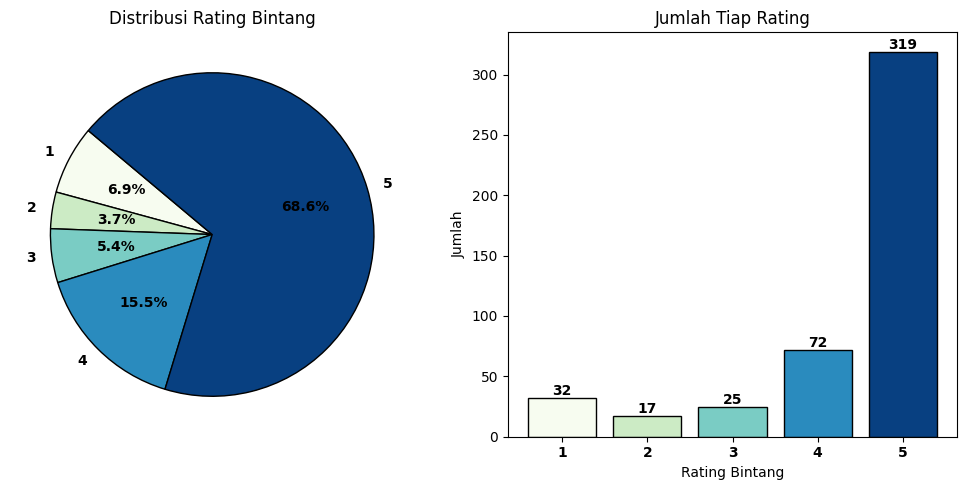

In [14]:
rating_counts = dataset['Rating'].value_counts().sort_index()
colors = cm.GnBu(np.linspace(0, 1, len(rating_counts)))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

wedges, texts, autotexts = axes[0].pie(
    rating_counts,    labels=rating_counts.index,    autopct='%1.1f%%',
    startangle=140,    colors=colors,    wedgeprops=dict(edgecolor='black'))
axes[0].set_title('Distribusi Rating Bintang')
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontweight('bold')

bars = axes[1].bar(
    rating_counts.index.astype(str),    rating_counts.values,
    color=colors,    edgecolor='black')
axes[1].set_title('Jumlah Tiap Rating')
axes[1].set_xlabel('Rating Bintang')
axes[1].set_ylabel('Jumlah')

for label in axes[1].get_xticklabels():
    label.set_fontweight('bold')
for bar in bars:
    yval = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center',      
        va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

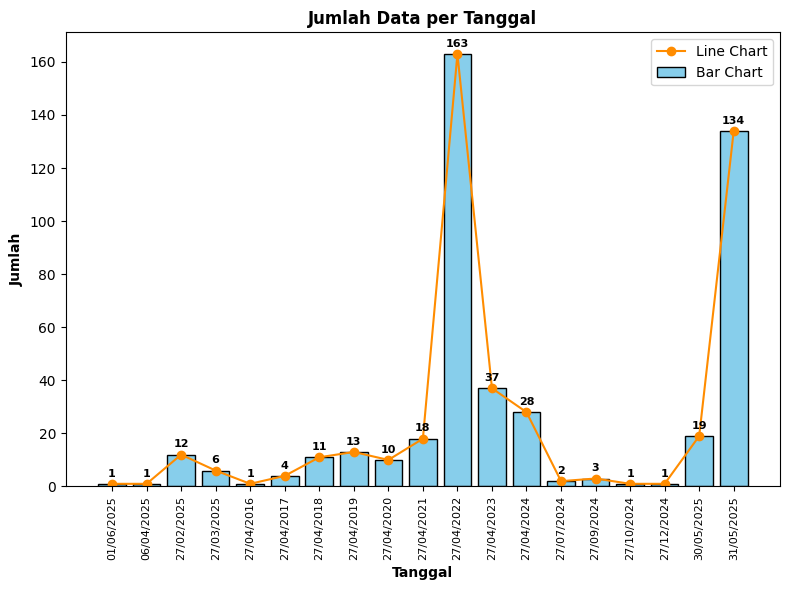

In [15]:
date_counts = dataset['Date'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(date_counts.index, date_counts.values, color='skyblue', edgecolor='black', label='Bar Chart')
plt.plot(date_counts.index, date_counts.values, color='darkorange', marker='o', label='Line Chart')

plt.title('Jumlah Data per Tanggal', fontweight='bold')
plt.xlabel('Tanggal', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.xticks(rotation=90,fontsize=8)

for i, val in enumerate(date_counts.values):
    plt.text(i, val+2, str(val), ha='center', va='bottom', fontsize=8,fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

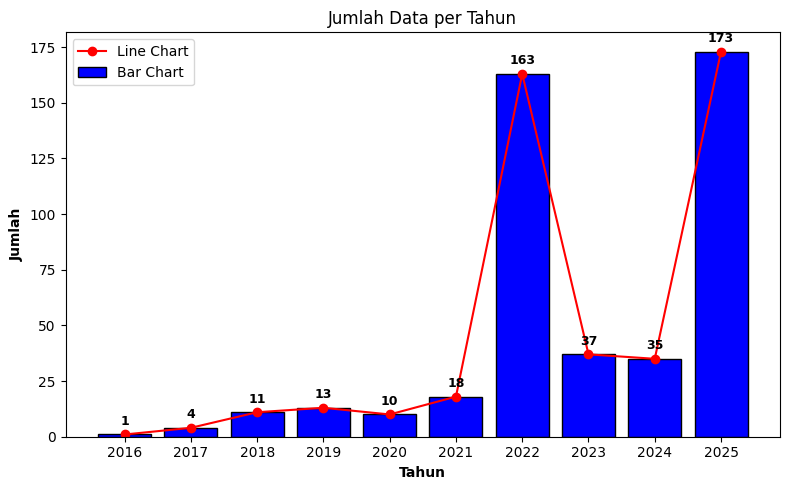

In [16]:
dataset['Year'] = pd.to_datetime(dataset['Date'], dayfirst=True).dt.year
year_counts = dataset['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(year_counts.index.astype(str), year_counts.values, color='Blue', edgecolor='black', label='Bar Chart')
plt.plot(year_counts.index.astype(str), year_counts.values, color='Red', marker='o', label='Line Chart')
plt.title('Jumlah Data per Tahun')
plt.xlabel('Tahun', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')

for i, val in enumerate(year_counts.values):
    plt.text(i, val + 3, str(val), ha='center', va='bottom', fontsize=9,fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

### _PREPROCESSING DATA_

#### _CLEANING & CASE FOLDING_

In [17]:
df = dataset
duplikat = df.duplicated()
jumlah_duplikat = duplikat.sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

baris_duplikat = df[df.duplicated()]
print("Baris duplikat:")
baris_duplikat

Jumlah baris duplikat: 0
Baris duplikat:


,Username,Date,Rating,Review,Year


In [18]:
duplikat = df.duplicated(subset='Review')
jumlah_duplikat = duplikat.sum()
print(f"Jumlah baris review duplikat: {jumlah_duplikat}")

jumlah_per_review = df['Review'].value_counts()
duplikat_review = jumlah_per_review[jumlah_per_review > 1]
tabel_duplikat = duplikat_review.reset_index()
tabel_duplikat.columns = ['Review', 'Jumlah Kemunculan']

print("\nReview yang duplikat beserta jumlah kemunculannya:")
tabel_duplikat

Jumlah baris review duplikat: 114

Review yang duplikat beserta jumlah kemunculannya:


,Review,Jumlah Kemunculan
0,-,108
1,Bagus,3
2,"Selamat Pagi, terima kasih untuk ulasan baikny...",2
3,Pelayanan bagus,2
4,"Tidak puas, saya datang pagi tapi selesai hamp...",2
5,Kantor yang bagus,2
6,"Sistem informasi di loket sudah oke, cuma kura...",2


In [19]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "[" 
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def clean_data(text):
    if not isinstance(text, str):
        return "" 
    text = html.unescape(text)
    text = re.sub(r'<[^>]+>', ' ', text)  # Menghapus semua tag HTML
    text = re.sub(r'&\w+;', ' ', text)  # Menghapus entitas HTML seperti &space
    text = re.sub(r"['\n&\\#]", "", text)  # Menghapus simbol seperti ' \n & #
    text = re.sub(r'(\w)(space)', r'\1 \2', text, flags=re.IGNORECASE)  # Mengubah 'space' menjadi spasi
    text = re.sub(r'[^a-zA-Z ]', ' ', text)  # Menghapus karakter selain huruf dan spasi
    text = re.sub(r'\s+', ' ', text).strip()  # Menghapus spasi berlebih
    return text.lower()

df['Review'] = df['Review'].apply(remove_emojis)
df['Review'] = df['Review'].astype(str)  
df['Review'] = df['Review'].apply(clean_data)
df = df[df['Review'] != '']

In [20]:
duplikat = df.duplicated(subset='Review')
jumlah_duplikat = duplikat.sum()
print(f"Jumlah baris review duplikat: {jumlah_duplikat}")

jumlah_per_review = df['Review'].value_counts()
duplikat_review = jumlah_per_review[jumlah_per_review > 1]
tabel_duplikat = duplikat_review.reset_index()
tabel_duplikat.columns = ['Review', 'Jumlah Kemunculan']

print("\nReview yang duplikat beserta jumlah kemunculannya:")
tabel_duplikat

Jumlah baris review duplikat: 10

Review yang duplikat beserta jumlah kemunculannya:


,Review,Jumlah Kemunculan
0,bagus,4
1,selamat pagi terima kasih untuk ulasan baiknya...,3
2,pelayanan bagus,3
3,tidak puas saya datang pagi tapi selesai hampi...,2
4,kantor yang bagus,2
5,sistem informasi di loket sudah oke cuma kuran...,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356 entries, 0 to 379
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  356 non-null    object
 1   Date      356 non-null    object
 2   Rating    356 non-null    int64 
 3   Review    356 non-null    object
 4   Year      356 non-null    int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 15.3+ KB


In [22]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

duplikat = kamus_data.duplicated()
jumlah_duplikat = duplikat.sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

duplikat = kamus_data.groupby(['tidak_baku', 'kata_baku']).size().reset_index(name='jumlah_kemunculan')
duplikat_lebih_dari_satu = duplikat[duplikat['jumlah_kemunculan'] > 1]

Jumlah baris duplikat: 10742


In [23]:
kamus_data = kamus_data.drop_duplicates(subset=['tidak_baku', 'kata_baku'])
duplikat = kamus_data.duplicated()
jumlah_duplikat = duplikat.sum()
print(f"Jumlah baris duplikat setelah dihapus: {jumlah_duplikat}")
kamus_data.to_csv('kamuskata.csv', index=False)

Jumlah baris duplikat setelah dihapus: 0


#### _NORMALISASI_

In [24]:
def normalisasi(teks):
    for tidak_baku, baku in kamus_tidak_baku.items():
        teks = re.sub(rf'\b{re.escape(tidak_baku)}\b', baku, teks)
    return teks

df['Normalization'] = df['Review'].apply(normalisasi)
df.to_csv('Normalisasi.csv', index=False)
df

C:\Users\asuss\AppData\Local\Temp\ipykernel_17556\729825768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Normalization'] = df['Review'].apply(normalisasi)


,Username,Date,Rating,Review,Year,Normalization
0,Adinda Aenun,30/05/2025,4,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...
1,cia aulia,30/05/2025,5,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...
2,Riska Saputri,30/05/2025,5,saya sangat mengapresiasi pelayanan yang diber...,2025,saya sangat mengapresiasi pelayanan yang diber...
3,grace mega,30/05/2025,5,saya merasa puas dengan pelayanan di kpp prata...,2025,saya merasa puas dengan pelayanan di kpp prata...
4,ramadhan saputra,30/05/2025,4,stafnya profesional dan sabar dalam menjawab p...,2025,stafnya profesional dan sabar dalam menjawab p...
...,...,...,...,...,...,...
352,setiawan tri yuniarto,27/04/2022,5,bagus,2022,bagus
360,Kiki Zkr,27/04/2024,5,selamat pagi terima kasih untuk ulasan baiknya...,2024,selamat pagi terima kasih untuk ulasan baiknya...
373,Ari Januar Rahmat,27/04/2023,5,selamat siang terima kasih untuk ulasan baikny...,2023,selamat siang terima kasih untuk ulasan baikny...
378,Ferry Widjaja,27/04/2023,5,selamat pagi terima kasih untuk ulasan baiknya...,2023,selamat pagi terima kasih untuk ulasan baiknya...


#### _TOKENIZING_

In [25]:
def tokenize_text(text):
    return text.split()
def tokens_to_string(tokensisasi):
    return ', '.join(tokensisasi)

df['Tokenizing'] = df['Normalization'].apply(tokenize_text)
df['Tokenizing'] = df['Tokenizing'].apply(tokens_to_string)
df.to_csv('Tokenizing.csv', index=False)
df.head()

C:\Users\asuss\AppData\Local\Temp\ipykernel_17556\3963052416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenizing'] = df['Normalization'].apply(tokenize_text)
C:\Users\asuss\AppData\Local\Temp\ipykernel_17556\3963052416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenizing'] = df['Tokenizing'].apply(tokens_to_string)


,Username,Date,Rating,Review,Year,Normalization,Tokenizing
0,Adinda Aenun,30/05/2025,4,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...,"pelayanan, di, kpp, pratama, surabaya, gubeng,..."
1,cia aulia,30/05/2025,5,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...,"pelayanan, di, kpp, pratama, surabaya, gubeng,..."
2,Riska Saputri,30/05/2025,5,saya sangat mengapresiasi pelayanan yang diber...,2025,saya sangat mengapresiasi pelayanan yang diber...,"saya, sangat, mengapresiasi, pelayanan, yang, ..."
3,grace mega,30/05/2025,5,saya merasa puas dengan pelayanan di kpp prata...,2025,saya merasa puas dengan pelayanan di kpp prata...,"saya, merasa, puas, dengan, pelayanan, di, kpp..."
4,ramadhan saputra,30/05/2025,4,stafnya profesional dan sabar dalam menjawab p...,2025,stafnya profesional dan sabar dalam menjawab p...,"stafnya, profesional, dan, sabar, dalam, menja..."


#### _STOPWORD REMOVAL_

In [26]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))  

def remove_stopwords(text):
    tokens = text.split(', ') 
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ', '.join(filtered_tokens)

df = pd.read_csv('Tokenizing.csv')
df['Stopword'] = df['Tokenizing'].apply(remove_stopwords)
df.to_csv('Stopword.csv', index=False)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asuss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Username,Date,Rating,Review,Year,Normalization,Tokenizing,Stopword
0,Adinda Aenun,30/05/2025,4,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...,"pelayanan, di, kpp, pratama, surabaya, gubeng,...","pelayanan, kpp, pratama, surabaya, gubeng, mem..."
1,cia aulia,30/05/2025,5,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...,"pelayanan, di, kpp, pratama, surabaya, gubeng,...","pelayanan, kpp, pratama, surabaya, gubeng, ram..."
2,Riska Saputri,30/05/2025,5,saya sangat mengapresiasi pelayanan yang diber...,2025,saya sangat mengapresiasi pelayanan yang diber...,"saya, sangat, mengapresiasi, pelayanan, yang, ...","mengapresiasi, pelayanan, kpp, pratama, suraba..."
3,grace mega,30/05/2025,5,saya merasa puas dengan pelayanan di kpp prata...,2025,saya merasa puas dengan pelayanan di kpp prata...,"saya, merasa, puas, dengan, pelayanan, di, kpp...","puas, pelayanan, kpp, pratama, surabaya, guben..."
4,ramadhan saputra,30/05/2025,4,stafnya profesional dan sabar dalam menjawab p...,2025,stafnya profesional dan sabar dalam menjawab p...,"stafnya, profesional, dan, sabar, dalam, menja...","stafnya, profesional, sabar, lokasinya, nyaman..."


#### _STEMMING_
Stemming adalah proses mengubah kata menjadi bentuk dasarnya dengan menghapus imbuhan (awalan, akhiran, sisipan, atau akhiran ganda). 

In [27]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def split_combined_words(text):
    text = re.sub(r'\bng([a-z]+)', r'\1', text)
    text = re.sub(r'\bke([a-z]+)', r'\1', text)
    text = re.sub(r'\bdi([a-z]+)', r'\1', text)
    text = re.sub(r'\bmeng([a-z]+)', r'\1', text)
    return text

def stem_text_with_split(text):
    text = split_combined_words(text)
    words = [word.strip() for word in text.split(',')]
    stemmed_words = [stemmer.stem(word) for word in words]
    return ', '.join(stemmed_words)

df['Stemming'] = df['Stopword'].apply(stem_text_with_split)
df.to_csv('Stemming.csv', index=False, encoding='utf-8')
df.head()

,Username,Date,Rating,Review,Year,Normalization,Tokenizing,Stopword,Stemming
0,Adinda Aenun,30/05/2025,4,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...,"pelayanan, di, kpp, pratama, surabaya, gubeng,...","pelayanan, kpp, pratama, surabaya, gubeng, mem...","layan, kpp, pratama, surabaya, gubeng, muas, t..."
1,cia aulia,30/05/2025,5,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...,"pelayanan, di, kpp, pratama, surabaya, gubeng,...","pelayanan, kpp, pratama, surabaya, gubeng, ram...","layan, kpp, pratama, surabaya, gubeng, ramah, ..."
2,Riska Saputri,30/05/2025,5,saya sangat mengapresiasi pelayanan yang diber...,2025,saya sangat mengapresiasi pelayanan yang diber...,"saya, sangat, mengapresiasi, pelayanan, yang, ...","mengapresiasi, pelayanan, kpp, pratama, suraba...","apresiasi, layan, kpp, pratama, surabaya, gube..."
3,grace mega,30/05/2025,5,saya merasa puas dengan pelayanan di kpp prata...,2025,saya merasa puas dengan pelayanan di kpp prata...,"saya, merasa, puas, dengan, pelayanan, di, kpp...","puas, pelayanan, kpp, pratama, surabaya, guben...","puas, layan, kpp, pratama, surabaya, gubeng, a..."
4,ramadhan saputra,30/05/2025,4,stafnya profesional dan sabar dalam menjawab p...,2025,stafnya profesional dan sabar dalam menjawab p...,"stafnya, profesional, dan, sabar, dalam, menja...","stafnya, profesional, sabar, lokasinya, nyaman...","staf, profesional, sabar, lokasi, nyaman, muda..."


#### _PEMETAAN_

In [28]:
df = pd.read_csv('Stemming.csv')
df['Stemming'] = df['Stemming'].fillna('')

def label_review(text):
    review = text.lower()
    tempat = [
        "lokasi", "tempat", "suasana", "nyaman", "bersih", "kotor", "ramai", "sepi", "indah",
        "parkir", "ac", "panas", "dingin", "kursi", "meja", "toilet", "dekorasi", "pencahayaan",
        "rapih", "ventilasi", "gelap", "terang", "sempit", "luas", "atap", "bising", "tenang",
        "udara", "pemandangan", "akses", "strategis", "jauh", "dekat", "jalan", "gang", 
        "teras", "halaman", "gedung", "bangunan", "atap", "atap bocor", "atap rendah",
        "atap tinggi", "atap rapuh", "atap kuat", "lantai", "lantai licin", "lantai kotor",
        "tangga", "lift", "eskalator", "atap terbuka", "atap tertutup", "atap berlubang",
        "atap genteng","kantor", "kantor pajak", "gedung pajak", "ruang tunggu", 
        "ruang pelayanan", "balai pajak", "pos pajak", "pintu masuk", "pintu keluar", "ruang"
    ]

    pelayanan = [
        "pelayanan", "layan", "ramah", "profesional","teller","staff", "staf", "karyawan", "pegawai", "cepat", "lambat", 
        "sopan", "jutek", "sigap", "responsif", "antri", "senyum", "cuek", "servis", "lama", 
        "customer service", "cs", "pengaduan", "keluhan", "layanan", "layan", "bantu", "bantuan",
        "penanganan", "respon", "slow", "buru-buru", "teledor", "sigap", "terburu-buru",
        "acuh", "antrean", "proses", "paket", "cs lambat", "cs cepat", "admin", "operator",
        "helpdesk", "receptionist", "resepsionis", "menunggu", "dilayani", "tidak dilayani", 
        "permintaan", "keamanan", "penjaga", "satpam", "security", "pengawalan", "handling",
        "leader", "bos", "solutip", "pajak", "spt", "coretax", "petugas pajak", "pegawai pajak",
        "verifikasi pajak", "konsultasi pajak", "pengembalian pajak", "penerimaan pajak", "tanggap",
        "kartu NPWP", "pembuatan NPWP", "perubahan data pajak", "loket pajak","loket","loket NPWP", "validasi pajak",
        "e-filing", "e-billing", "NPWP online", "peraturan pajak", "denda pajak", "sanksi pajak",
        "lapor pajak", "pajak kendaraan", "pajak penghasilan", "pajak tahunan", "pajak usaha",
        "pajak daerah", "nomor pokok wajib pajak", "wajib pajak", "kebijakan pajak", "insentif pajak",
        "pemutihan pajak", "kewajiban pajak", "konsultasi perpajakan", "audit pajak", "pajak UMKM",
        "pajak badan", "tarif pajak", "restitusi pajak", "administrasi pajak", "pajak pertambahan nilai",
        "ppn", "pph", "spt tahunan", "spt masa", "kredit pajak", "pemungutan pajak", "pelaporan pajak"
    ]
    if any(keyword in review for keyword in pelayanan):
        return 'pelayanan'
    elif any(keyword in review for keyword in tempat):
        return 'tempat'
    else:
        return 'overall'

df['Pemetaan'] = df['Stemming'].apply(label_review)
df.to_csv('Pemetaan.csv', index=False)

In [29]:
label_counts = df['Pemetaan'].value_counts().reset_index()
label_counts.columns = ['Label', 'Jumlah']
label_counts

,Label,Jumlah
0,pelayanan,292
1,overall,46
2,tempat,18


C:\Users\asuss\AppData\Local\Temp\ipykernel_17556\1464306229.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2', ax=axes[0])


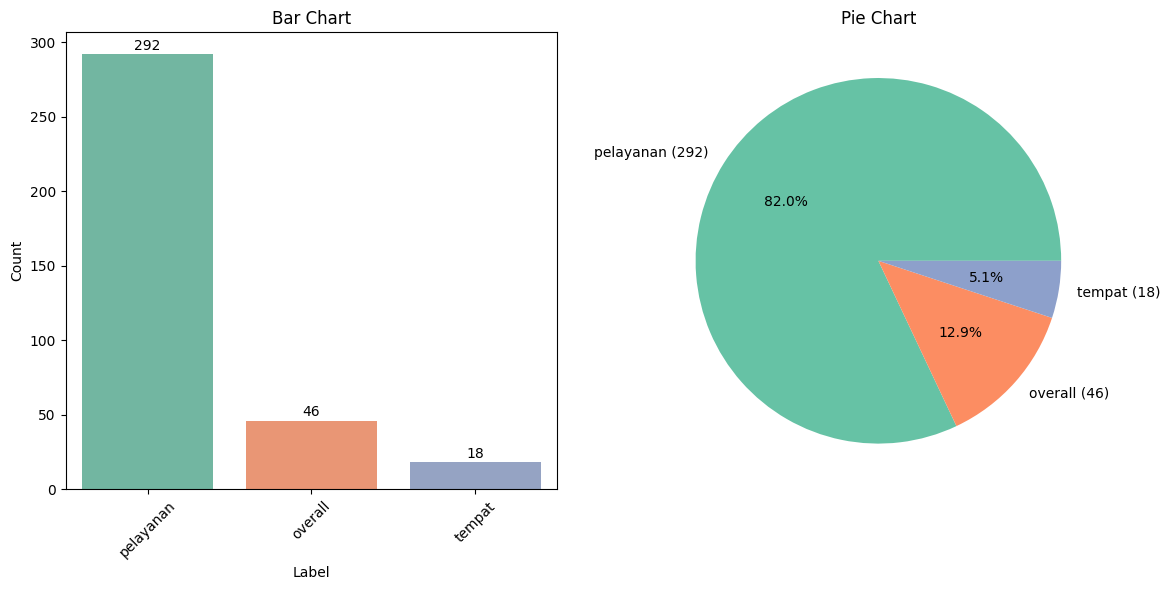

In [30]:
label_counts = df['Pemetaan'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2', ax=axes[0])
for i, count in enumerate(label_counts.values):
    axes[0].text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
axes[0].set_title('Bar Chart')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

axes[1].pie(label_counts, labels=[f'{label} ({count})' for label, count in zip(label_counts.index, label_counts.values)], 
            autopct='%1.1f%%', colors=sns.color_palette('Set2', len(label_counts)))
axes[1].set_title('Pie Chart')

plt.tight_layout()
plt.show()

### KLASIFIKASI SENTIMEN MASYARAKAT TERHADAP LAYANAN KPP PRATAMA GUBENG BERBASIS NAIVE BAYES DAN SVM

#### _LABELLING_

##### TEXTBLOB

In [31]:
# def convert_rating_to_number(rating_str):
#     if isinstance(rating_str, str):
#         try:
#             return int(rating_str.split()[0]) 
#         except ValueError:
#             return 0 
#     else:
#         return rating_str  
# df['Rating'] = df['Rating'].apply(convert_rating_to_number)

In [32]:
def get_sentiment_based_on_rating(text, rating):
    analysis = TextBlob(text)
    if rating <= 2: 
        return 'Negatif'
    elif rating >= 4:  
        return 'Positif'
    else:
        if analysis.sentiment.polarity > 0:
            return 'Positif'
        else:
            return 'Negatif'

df['Sentiment'] = df.apply(lambda row: get_sentiment_based_on_rating(row['Review'], row['Rating']), axis=1)
df[['Username', 'Date', 'Rating', 'Review', 'Pemetaan', 'Sentiment']].to_csv('Sentiment.csv', index=False, encoding='utf-8')

sentiment_counts = df['Sentiment'].value_counts()
print("Jumlah komentar Positif:", sentiment_counts.get('Positif', 0))
print("Jumlah komentar Negatif:", sentiment_counts.get('Negatif', 0))

Jumlah komentar Positif: 293
Jumlah komentar Negatif: 63


In [33]:
df.to_csv('Sentiment.csv', index=False)
df.head()

,Username,Date,Rating,Review,Year,Normalization,Tokenizing,Stopword,Stemming,Pemetaan,Sentiment
0,Adinda Aenun,30/05/2025,4,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...,"pelayanan, di, kpp, pratama, surabaya, gubeng,...","pelayanan, kpp, pratama, surabaya, gubeng, mem...","layan, kpp, pratama, surabaya, gubeng, muas, t...",pelayanan,Positif
1,cia aulia,30/05/2025,5,pelayanan di kpp pratama surabaya gubeng sanga...,2025,pelayanan di kpp pratama surabaya gubeng sanga...,"pelayanan, di, kpp, pratama, surabaya, gubeng,...","pelayanan, kpp, pratama, surabaya, gubeng, ram...","layan, kpp, pratama, surabaya, gubeng, ramah, ...",pelayanan,Positif
2,Riska Saputri,30/05/2025,5,saya sangat mengapresiasi pelayanan yang diber...,2025,saya sangat mengapresiasi pelayanan yang diber...,"saya, sangat, mengapresiasi, pelayanan, yang, ...","mengapresiasi, pelayanan, kpp, pratama, suraba...","apresiasi, layan, kpp, pratama, surabaya, gube...",pelayanan,Positif
3,grace mega,30/05/2025,5,saya merasa puas dengan pelayanan di kpp prata...,2025,saya merasa puas dengan pelayanan di kpp prata...,"saya, merasa, puas, dengan, pelayanan, di, kpp...","puas, pelayanan, kpp, pratama, surabaya, guben...","puas, layan, kpp, pratama, surabaya, gubeng, a...",pelayanan,Positif
4,ramadhan saputra,30/05/2025,4,stafnya profesional dan sabar dalam menjawab p...,2025,stafnya profesional dan sabar dalam menjawab p...,"stafnya, profesional, dan, sabar, dalam, menja...","stafnya, profesional, sabar, lokasinya, nyaman...","staf, profesional, sabar, lokasi, nyaman, muda...",pelayanan,Positif


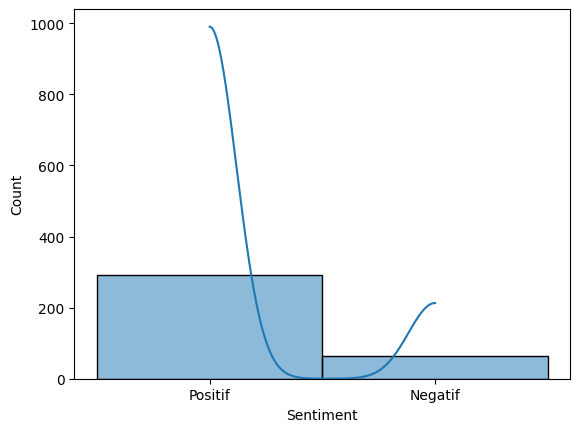

In [34]:
sns.histplot(df['Sentiment'], kde=True)
plt.show()

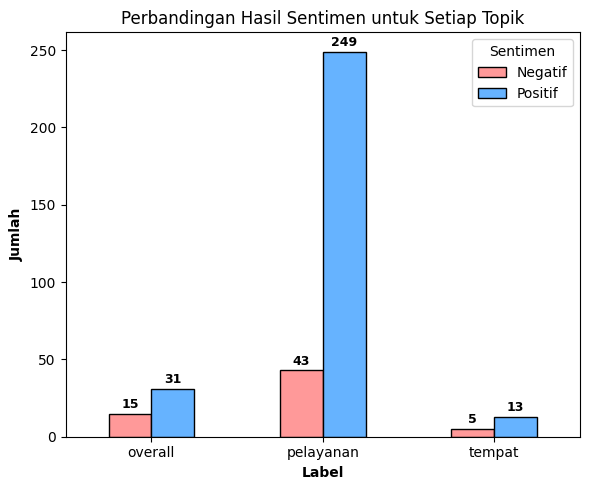

In [35]:
count_data = df.groupby(['Pemetaan', 'Sentiment']).size().unstack(fill_value=0)
ax = count_data.plot(
    kind='bar',
    figsize=(6, 5),
    color=['#ff9999', '#66b3ff'],
    edgecolor='black'
)
plt.xlabel('Label', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.title('Perbandingan Hasil Sentimen untuk Setiap Topik')

for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline',        fontsize=9,
        color='black',        xytext=(0, 4),  textcoords='offset points',fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Sentimen')
plt.tight_layout()
plt.show()


In [36]:
# sns.countplot(x='Sentiment', data=df)
# plt.show()

##### WORDCLOUD

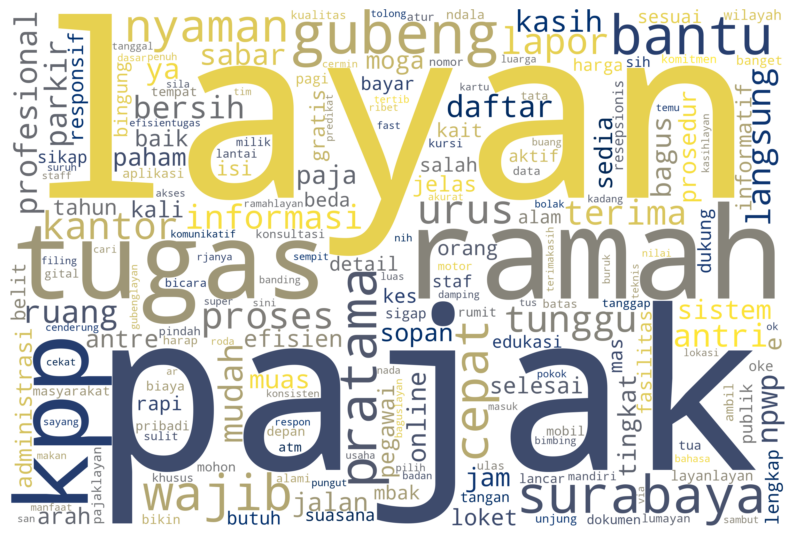

In [37]:
def plot_cloud (wordcloud): 
    plt.figure(figsize=(10, 8)) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis('off') 
    plt.show() 
all_words = ''.join([tweets for tweets in df['Stemming']]) 
wordcloud = WordCloud (width=3000, height=2000, random_state=3, background_color='white', 
                       colormap='cividis', collocations=False, stopwords=STOPWORDS).generate(all_words) 
plot_cloud (wordcloud)
# gist_ncar

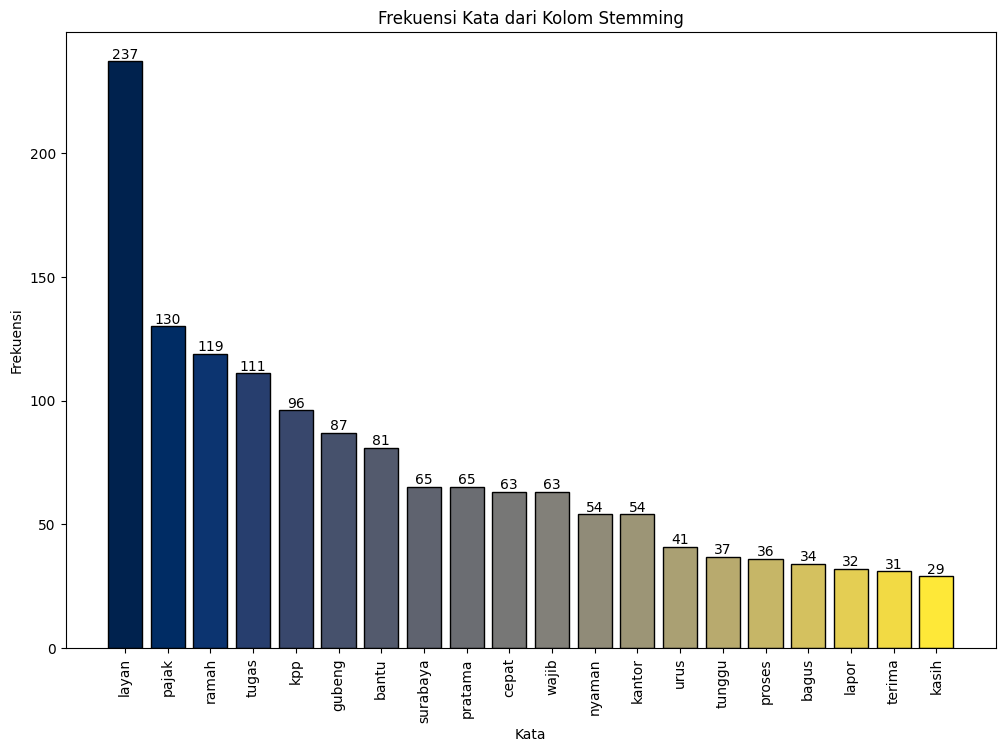

In [38]:
text_data = ' '.join(df['Stemming'])
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text_data])
word_freq = X.toarray().flatten()
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

colormap = 'cividis'  
num_bars = len(word_freq_df['Word'][:20])
colors = plt.get_cmap(colormap)(np.linspace(0, 1, num_bars))
plt.figure(figsize=(12, 8))
bars = plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color=colors, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kata dari Kolom Stemming')
plt.xticks(rotation=90)  
plt.show()

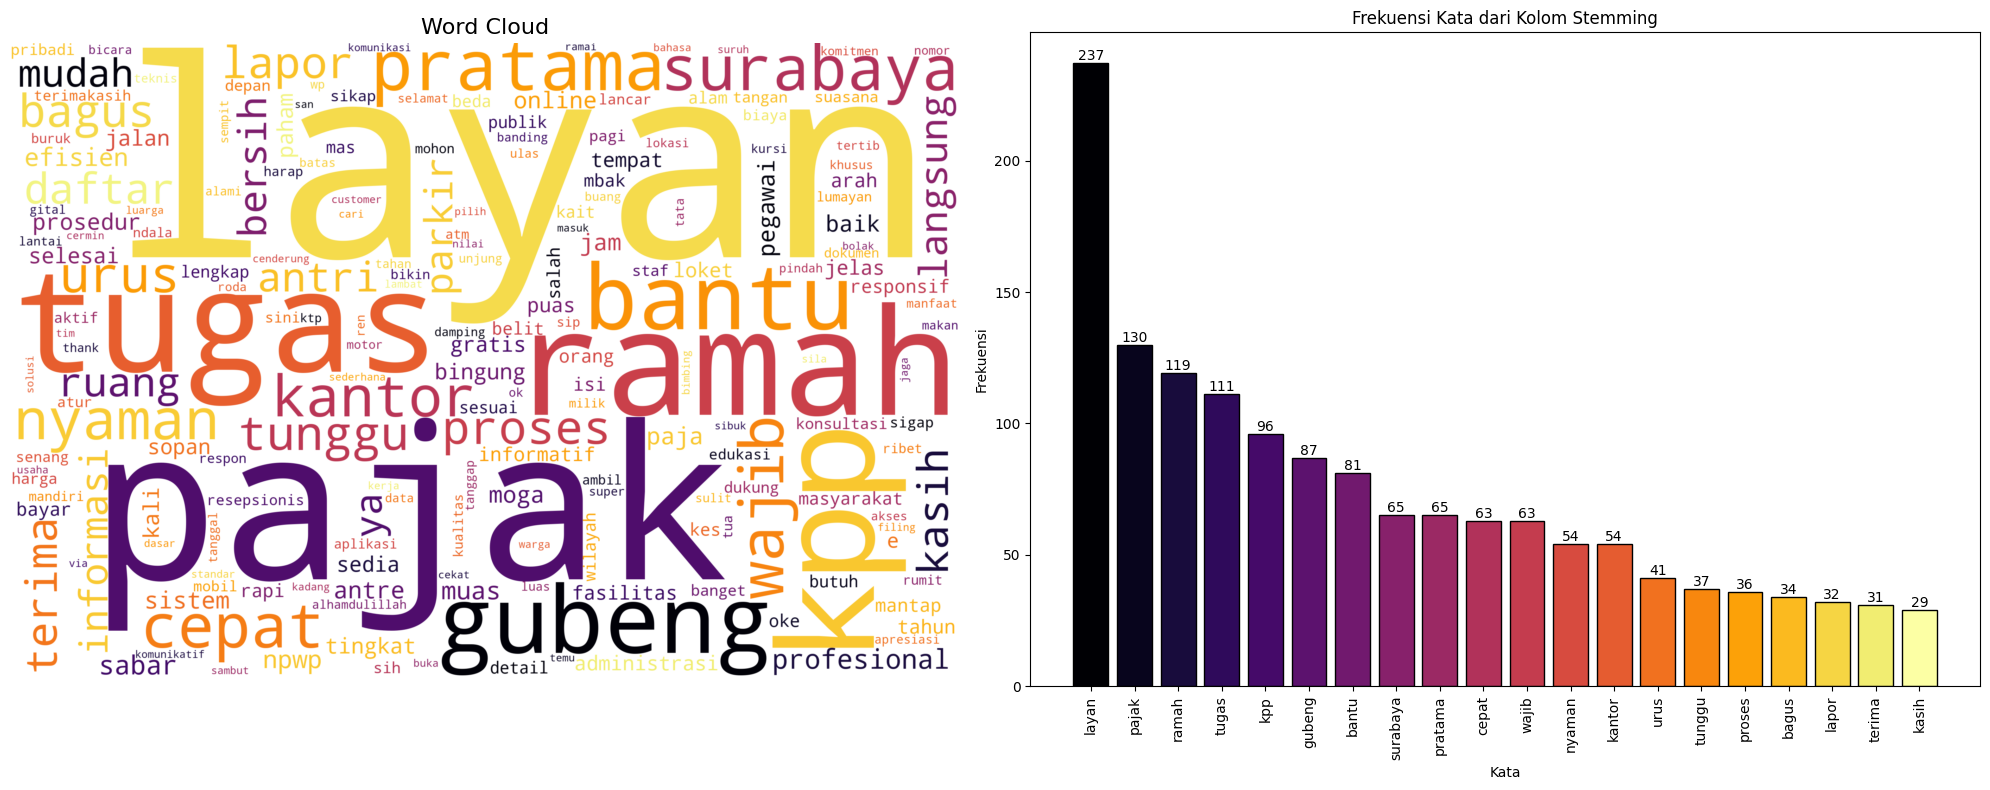

In [39]:
all_words = ' '.join(df['Stemming'])
wordcloud = WordCloud(
    width=3000,    height=2000,    random_state=3,    background_color='white',
    colormap='inferno',    collocations=False,    stopwords=STOPWORDS
).generate(all_words)

text_data = ' '.join(df['Stemming'])
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text_data])
word_freq = X.toarray().flatten()
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud', fontsize=16)
colormap = 'inferno'
num_bars = len(word_freq_df['Word'][:20])
colors = plt.get_cmap(colormap)(np.linspace(0, 1, num_bars))

bars = axes[1].bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color=colors, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
axes[1].set_xlabel('Kata')
axes[1].set_ylabel('Frekuensi')
axes[1].set_title('Frekuensi Kata dari Kolom Stemming')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##### BALANCING

In [40]:
df_positif = df[df['Sentiment'] == 'Positif']
df_negatif = df[df['Sentiment'] == 'Negatif']
df_positif_balanced = df_positif.sample(n=60, random_state=42)
df_negatif_balanced = df_negatif.sample(n=60, random_state=42)

df_balanced = pd.concat([df_positif_balanced, df_negatif_balanced])
df_balanced.to_csv("load_balanced.csv", index=False)
df = pd.read_csv("load_balanced.csv")

In [41]:
missing_data = df.isnull().sum()
print("Jumlah data kosong per kolom:")
print(missing_data[missing_data > 0])

Jumlah data kosong per kolom:
Series([], dtype: int64)


##### NAIVEBAYES

Jumlah Data Latih: 96
Jumlah Data Uji: 24

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.86      0.55      0.67        11
     Positif       0.71      0.92      0.80        13

    accuracy                           0.75        24
   macro avg       0.78      0.73      0.73        24
weighted avg       0.78      0.75      0.74        24



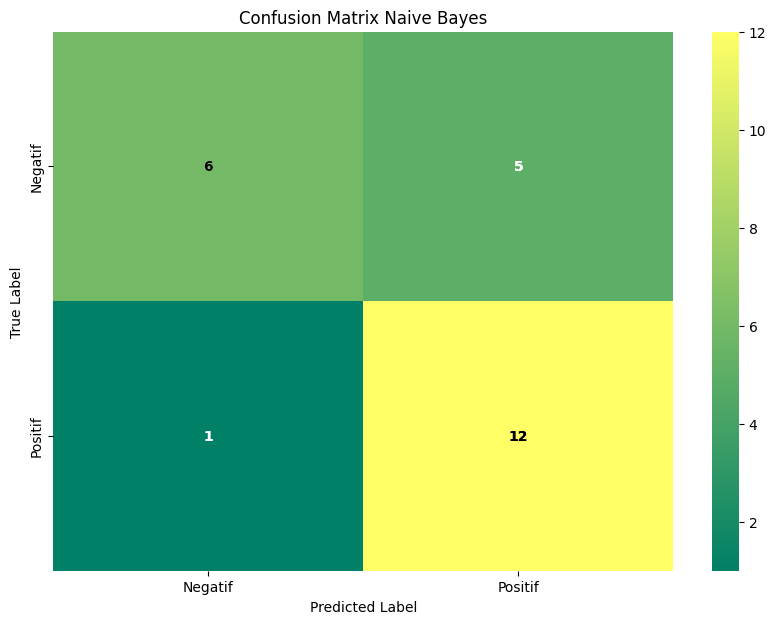

Confusion Matrix:
 [[ 6  5]
 [ 1 12]]


In [42]:
X = df['Stemming']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,    annot=True,    fmt='d',    cmap='summer',    xticklabels=model.classes_,    
    yticklabels=model.classes_,    annot_kws={"size": 10, "weight": "bold"}, cbar=True)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm[i, j]
        color = 'white' if value < cm.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, str(value),
                 ha='center', va='center', color=color, fontsize=10, fontweight='bold')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Naive Bayes')
plt.show()
print("Confusion Matrix:\n", cm)

In [43]:
def class_accuracies(conf_matrix):
    true_positive = np.diag(conf_matrix)
    total_per_class = np.sum(conf_matrix, axis=1)
    accuracies = true_positive / total_per_class
    return accuracies
accuracies = class_accuracies(cm)
for label, acc in zip(model.classes_, accuracies):
    print(f'Akurasi Kelas {label}: {acc * 100:.2f}%')

Akurasi Kelas Negatif: 54.55%
Akurasi Kelas Positif: 92.31%


In [44]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
threshold_list = [0.3, 0.2, 0.1]  

for test_size in threshold_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1) 
results = pd.DataFrame({
    'Training Data Percentage': [70, 80, 90],
    'Accuracy': accuracy_list, 'Precision': precision_list, 'Recall': recall_list, 'F1 Score': f1_list})
results.to_csv('result.csv', index=False)
print(results)

   Training Data Percentage  Accuracy  Precision    Recall  F1 Score
0                        70  0.694444   0.694097  0.694444  0.693732
1                        80  0.750000   0.775210  0.750000  0.738889
2                        90  0.750000   0.771429  0.750000  0.755556


In [45]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision  recall  f1-score  support
Negatif        0.600000    0.75  0.666667     4.00
Positif        0.857143    0.75  0.800000     8.00
accuracy       0.750000    0.75  0.750000     0.75
macro avg      0.728571    0.75  0.733333    12.00
weighted avg   0.771429    0.75  0.755556    12.00


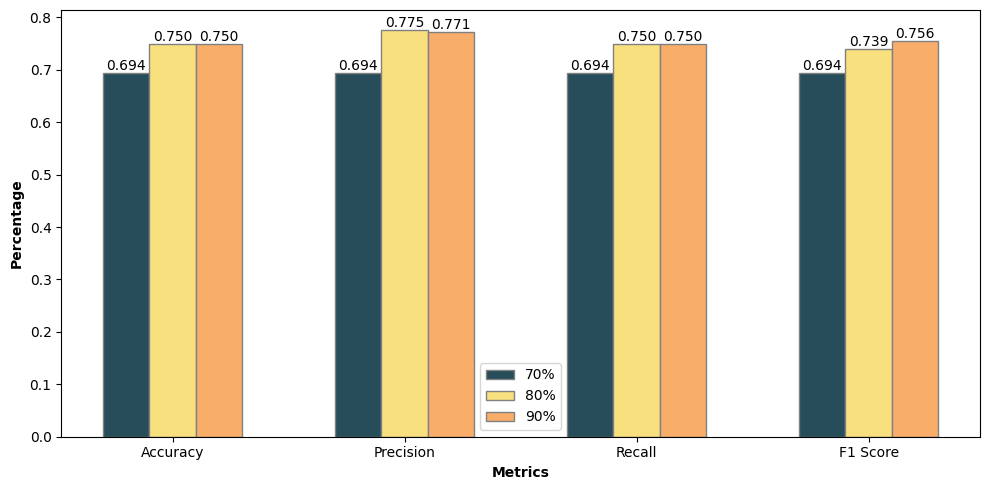

In [46]:
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_70 = results[results['Training Data Percentage'] == 70].iloc[0, 1:].values
values_80 = results[results['Training Data Percentage'] == 80].iloc[0, 1:].values
values_90 = results[results['Training Data Percentage'] == 90].iloc[0, 1:].values

bar_width = 0.2
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 5))
bars_70 = plt.bar(r1, values_70, color='#264d59', width=bar_width, edgecolor='grey', label='70%')
bars_80 = plt.bar(r2, values_80, color='#f9e07f', width=bar_width, edgecolor='grey', label='80%')
bars_90 = plt.bar(r3, values_90, color='#f9ad6a', width=bar_width, edgecolor='grey', label='90%')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', 
                 ha='center', va='bottom', fontsize=10)
add_labels(bars_70)
add_labels(bars_80)
add_labels(bars_90)

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.legend()
plt.tight_layout()
plt.show()

##### Support Vector Machine

Jumlah Data Latih: 96
Jumlah Data Uji: 24

Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.58      0.64      0.61        11
     Positif       0.67      0.62      0.64        13

    accuracy                           0.62        24
   macro avg       0.62      0.63      0.62        24
weighted avg       0.63      0.62      0.63        24



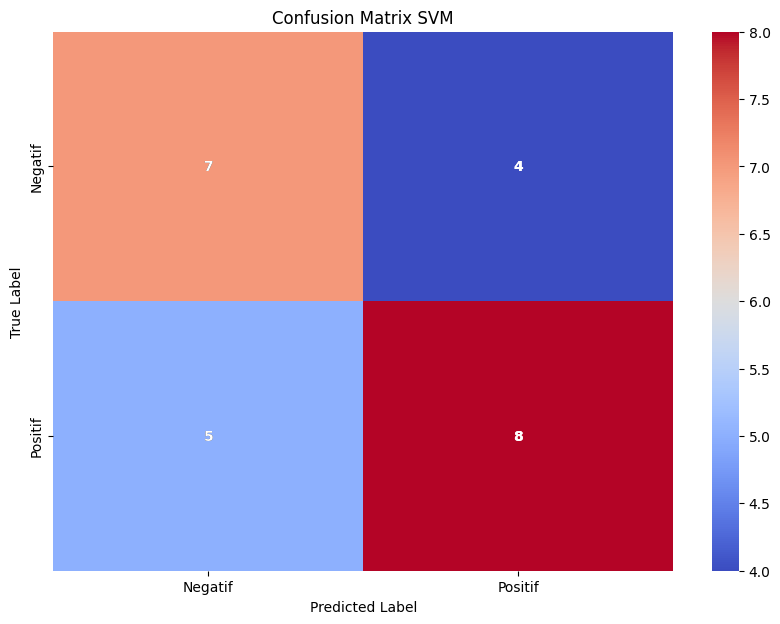

Confusion Matrix:
 [[7 4]
 [5 8]]


In [47]:
X = df['Stemming']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = SVC(kernel='linear', random_state=42)  
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,    annot=True,    fmt='d',    cmap='coolwarm',    xticklabels=model.classes_,    
    yticklabels=model.classes_,    annot_kws={"size": 10, "weight": "bold"}, cbar=True)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm[i, j]
        color = 'black' if value < cm.max() / 2 else 'white'
        plt.text(j + 0.5, i + 0.5, str(value),
                 ha='center', va='center', color=color, fontsize=10, fontweight='bold')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix SVM')
plt.show()
print("Confusion Matrix:\n", cm)

In [48]:
def class_accuracies(conf_matrix):
    true_positive = np.diag(conf_matrix)
    total_per_class = np.sum(conf_matrix, axis=1)
    accuracies = true_positive / total_per_class
    return accuracies
accuracies = class_accuracies(cm)
for label, acc in zip(model.classes_, accuracies):
    print(f'Akurasi Kelas {label}: {acc * 100:.2f}%')

Akurasi Kelas Negatif: 63.64%
Akurasi Kelas Positif: 61.54%


In [49]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
threshold_list = [0.3, 0.2, 0.1]  
vectorizer = CountVectorizer()
model = SVC(kernel='linear', random_state=42)  # Using linear kernel

for test_size in threshold_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
results = pd.DataFrame({
    'Training Data Percentage': [100 - int(ts * 100) for ts in threshold_list],    'Accuracy': accuracy_list,
    'Precision': precision_list, 'Recall': recall_list,    'F1 Score': f1_list})
results.to_csv('result_svm.csv', index=False)
print(results)

   Training Data Percentage  Accuracy  Precision    Recall  F1 Score
0                        70  0.722222   0.722222  0.722222  0.722222
1                        80  0.625000   0.628472  0.625000  0.625652
2                        90  0.583333   0.676190  0.583333  0.592075


In [50]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score    support
Negatif        0.428571  0.750000  0.545455   4.000000
Positif        0.800000  0.500000  0.615385   8.000000
accuracy       0.583333  0.583333  0.583333   0.583333
macro avg      0.614286  0.625000  0.580420  12.000000
weighted avg   0.676190  0.583333  0.592075  12.000000


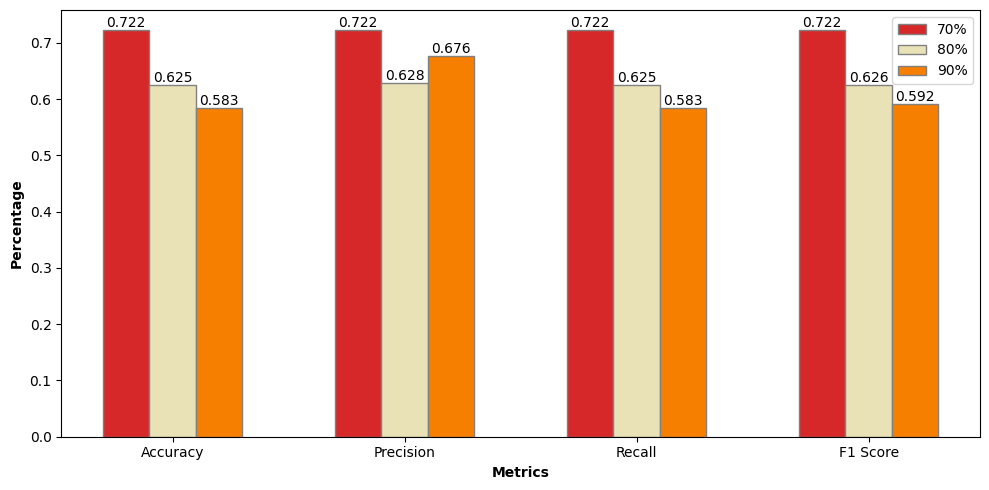

In [51]:
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_70 = results[results['Training Data Percentage'] == 70].iloc[0, 1:].values
values_80 = results[results['Training Data Percentage'] == 80].iloc[0, 1:].values
values_90 = results[results['Training Data Percentage'] == 90].iloc[0, 1:].values

bar_width = 0.2
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 5))
bars_70 = plt.bar(r1, values_70, color='#d62828', width=bar_width, edgecolor='grey', label='70%')
bars_80 = plt.bar(r2, values_80, color='#eae2b7', width=bar_width, edgecolor='grey', label='80%')
bars_90 = plt.bar(r3, values_90, color='#f77f00', width=bar_width, edgecolor='grey', label='90%')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', 
                 ha='center', va='bottom', fontsize=10)
add_labels(bars_70)
add_labels(bars_80)
add_labels(bars_90)

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.legend()
plt.tight_layout()
plt.show()

#### _BERDASARKAN LABEL_

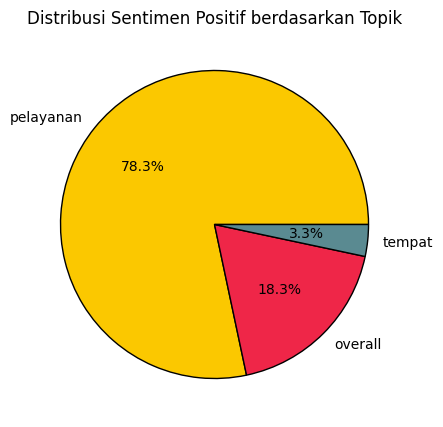

In [52]:
df_positif = df[df['Sentiment'] == 'Positif']
label_counts = df_positif['Pemetaan'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#fbc800','#ef2648','#5a8a91'], 
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Sentimen Positif berdasarkan Topik')
plt.show()

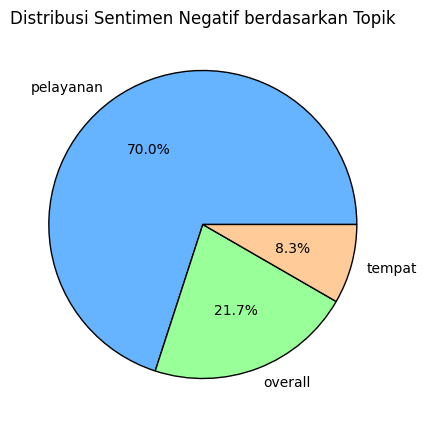

In [53]:
df_positif = df[df['Sentiment'] == 'Negatif']
label_counts = df_positif['Pemetaan'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'], 
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Sentimen Negatif berdasarkan Topik')
plt.show()

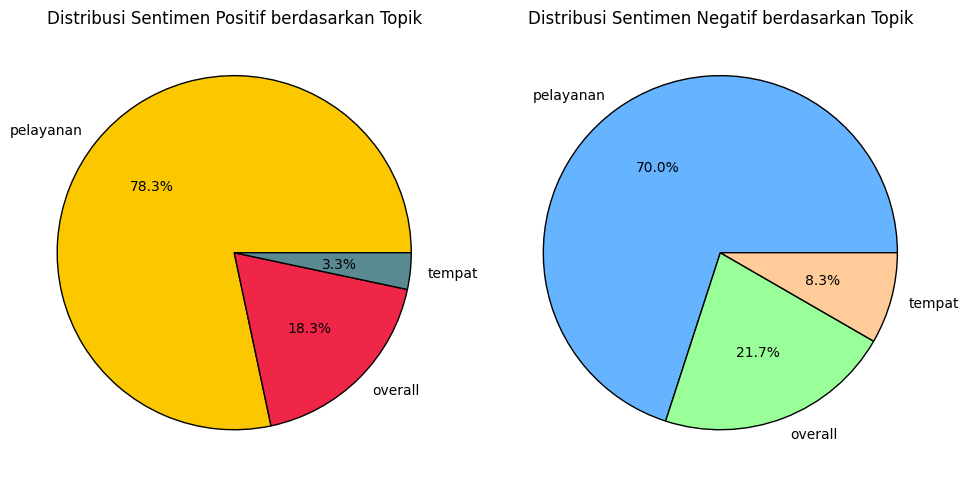

In [54]:
df_positif = df[df['Sentiment'] == 'Positif']
label_counts_positif = df_positif['Pemetaan'].value_counts()
df_negatif = df[df['Sentiment'] == 'Negatif']
label_counts_negatif = df_negatif['Pemetaan'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].pie(label_counts_positif, labels=label_counts_positif.index, autopct='%1.1f%%', 
            colors=['#fbc800','#ef2648','#5a8a91'], wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Distribusi Sentimen Positif berdasarkan Topik')
axes[1].pie(label_counts_negatif, labels=label_counts_negatif.index, autopct='%1.1f%%', 
            colors=['#66b3ff','#99ff99','#ffcc99'], wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Distribusi Sentimen Negatif berdasarkan Topik')
plt.tight_layout()
plt.show()

#### _TIAP LABEL_

##### Pelayanan

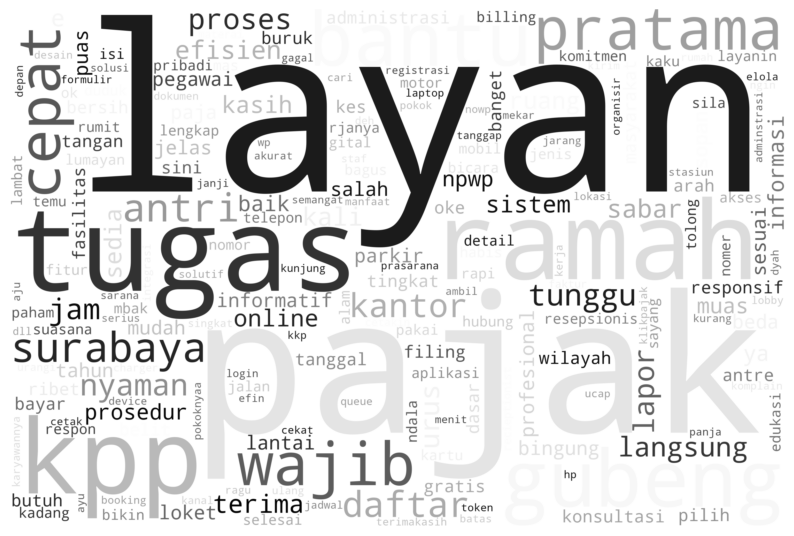

In [55]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
label = 'pelayanan'  
text_data = df[df['Pemetaan'] == label]['Stemming']
all_words = ' '.join(text_data)
wordcloud = WordCloud(width=3000, height=2000, random_state=3, background_color='white',
                      colormap='Greys', collocations=False, stopwords=STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

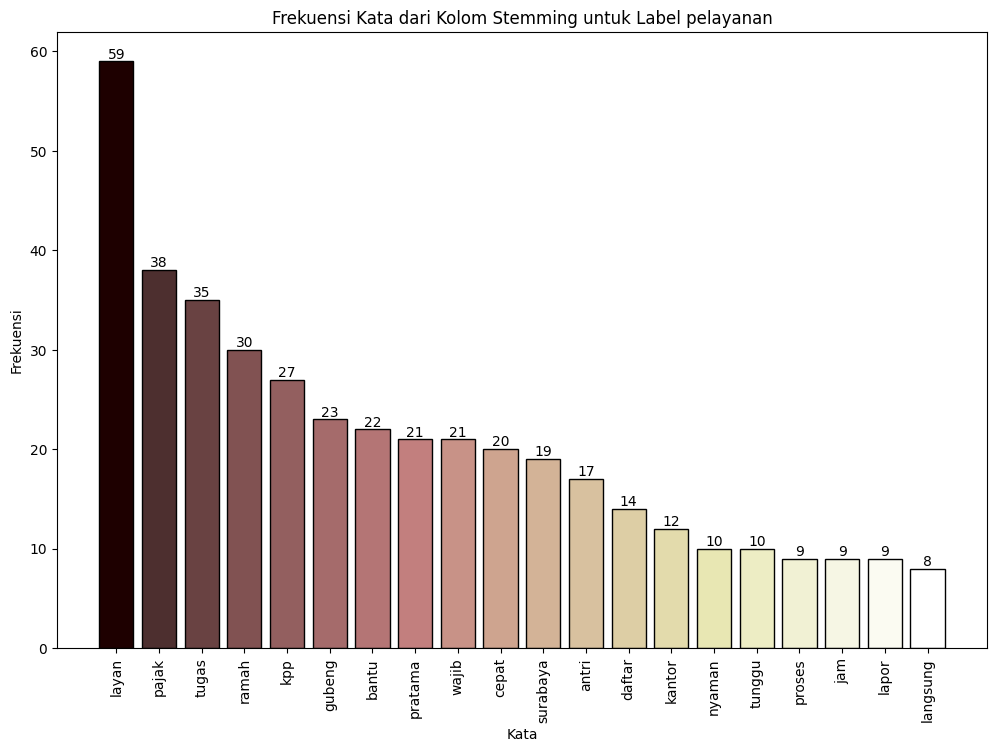

In [56]:
label = 'pelayanan' 
text_data = ' '.join(df[df['Pemetaan'] == label]['Stemming'])
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text_data])
word_freq = X.toarray().flatten()
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

colormap = 'pink'
num_bars = len(word_freq_df['Word'][:20])
colors = plt.get_cmap(colormap)(np.linspace(0, 1, num_bars))
plt.figure(figsize=(12, 8))
bars = plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color=colors, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title(f'Frekuensi Kata dari Kolom Stemming untuk Label {label}')
plt.xticks(rotation=90)
plt.show()

In [57]:
df_pelayanan = df[df['Pemetaan'] == 'pelayanan']
X = df_pelayanan['Stemming']
y = df_pelayanan['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

def class_accuracies(conf_matrix):
    true_positive = np.diag(conf_matrix)  
    total_per_class = np.sum(conf_matrix, axis=1) 
    accuracies = true_positive / total_per_class  
    return accuracies
accuracies = class_accuracies(cm)
for sentimen, acc in zip(model.classes_, accuracies):
    print(f'Akurasi Kelas {sentimen} SVM {label}: {acc * 100:.2f}%')
print(f"\nConfusion Matrix SVM {label}:\n", cm)

Akurasi Kelas Negatif SVM pelayanan: 100.00%
Akurasi Kelas Positif SVM pelayanan: 90.91%

Confusion Matrix SVM pelayanan:
 [[ 7  0]
 [ 1 10]]


In [58]:
df_pelayanan = df[df['Pemetaan'] == 'pelayanan']
X = df_pelayanan['Stemming']
y = df_pelayanan['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

def class_accuracies(conf_matrix):
    true_positive = np.diag(conf_matrix)
    total_per_class = np.sum(conf_matrix, axis=1)
    accuracies = true_positive / total_per_class
    return accuracies
accuracies = class_accuracies(cm)
for sentimen, acc in zip(model.classes_, accuracies):
    print(f'Akurasi Kelas {sentimen} NB {label}: {acc * 100:.2f}%')
print(f"\nConfusion Matrix NB {label}:\n", cm)

Akurasi Kelas Negatif NB pelayanan: 57.14%
Akurasi Kelas Positif NB pelayanan: 90.91%

Confusion Matrix NB pelayanan:
 [[ 4  3]
 [ 1 10]]


##### Tempat

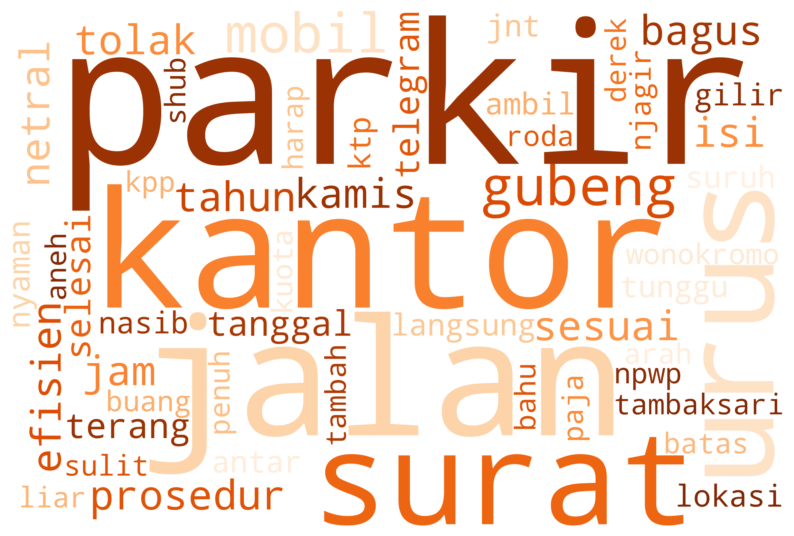

In [59]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
label = 'tempat'  
text_data = df[df['Pemetaan'] == label]['Stemming']
all_words = ' '.join(text_data)
wordcloud = WordCloud(width=3000, height=2000, random_state=3, background_color='white',
                      colormap='Oranges', collocations=False, stopwords=STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

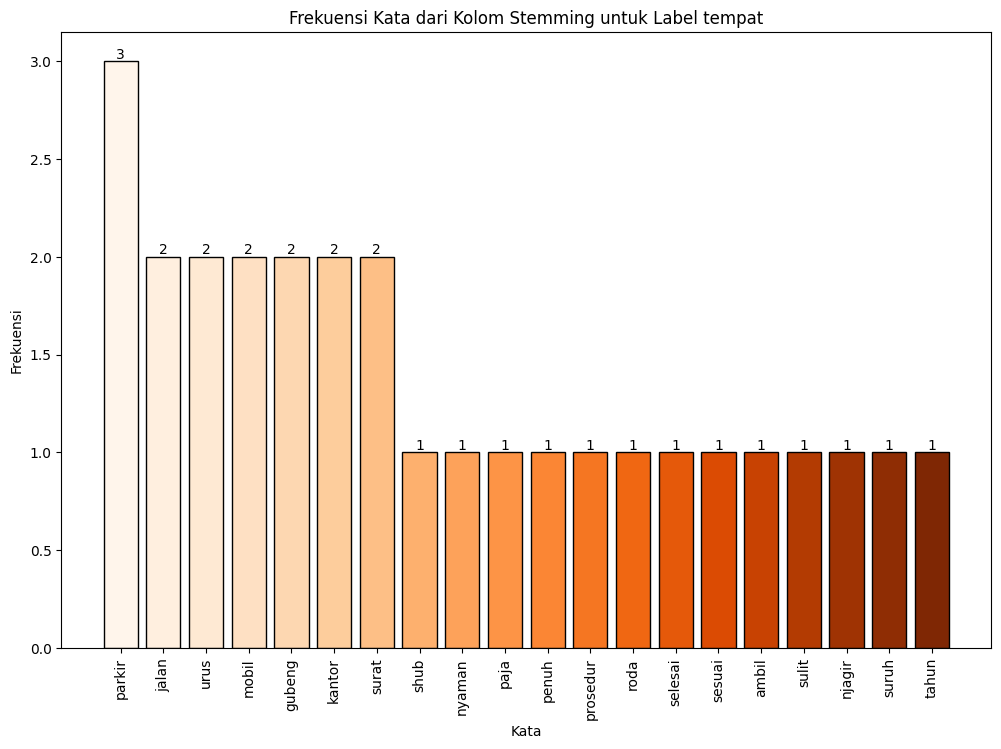

In [60]:
label = 'tempat' 
text_data = ' '.join(df[df['Pemetaan'] == label]['Stemming'])
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text_data])
word_freq = X.toarray().flatten()
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

colormap = 'Oranges'
num_bars = len(word_freq_df['Word'][:20])
colors = plt.get_cmap(colormap)(np.linspace(0, 1, num_bars))
plt.figure(figsize=(12, 8))
bars = plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color=colors, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title(f'Frekuensi Kata dari Kolom Stemming untuk Label {label}')
plt.xticks(rotation=90)
plt.show()

In [61]:
# df_tempat = df[df['Pemetaan'] == 'tempat']
# X = df_tempat['Stemming']
# y = df_tempat['Sentiment']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# vectorizer = CountVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)
# model = SVC(kernel='linear', random_state=42)
# model.fit(X_train_vec, y_train)
# y_pred = model.predict(X_test_vec)
# cm = confusion_matrix(y_test, y_pred)

# def class_accuracies(conf_matrix):
#     true_positive = np.diag(conf_matrix)  
#     total_per_class = np.sum(conf_matrix, axis=1) 
#     accuracies = true_positive / total_per_class  
#     return accuracies
# accuracies = class_accuracies(cm)
# for sentimen, acc in zip(model.classes_, accuracies):
#     print(f'Akurasi Kelas {sentimen} SVM {label}: {acc * 100:.2f}%')
# print(f"\nConfusion Matrix SVM {label}:\n", cm)

In [62]:
df_tempat = df[df['Pemetaan'] == 'tempat']
if df_tempat['Sentiment'].nunique() > 1:
    X = df_tempat['Stemming']
    y = df_tempat['Sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    cm = confusion_matrix(y_test, y_pred)

    def class_accuracies(conf_matrix):
        true_positive = np.diag(conf_matrix)
        total_per_class = np.sum(conf_matrix, axis=1)
        accuracies = true_positive / total_per_class
        return accuracies

    accuracies = class_accuracies(cm)
    for sentimen, acc in zip(model.classes_, accuracies):
        print(f'Akurasi Kelas {sentimen} SVM tempat: {acc * 100:.2f}%')
    print(f"\nConfusion Matrix SVM tempat:\n", cm)

Akurasi Kelas Negatif SVM tempat: 100.00%
Akurasi Kelas Positif SVM tempat: 0.00%

Confusion Matrix SVM tempat:
 [[1 0]
 [1 0]]


In [63]:
# df_tempat = df[df['Pemetaan'] == 'tempat']
# X = df_tempat['Stemming']
# y = df_tempat['Sentiment']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# vectorizer = CountVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)
# model = MultinomialNB()
# model.fit(X_train_vec, y_train)
# y_pred = model.predict(X_test_vec)
# cm = confusion_matrix(y_test, y_pred)

# def class_accuracies(conf_matrix):
#     true_positive = np.diag(conf_matrix)
#     total_per_class = np.sum(conf_matrix, axis=1)
#     accuracies = true_positive / total_per_class
#     return accuracies
# accuracies = class_accuracies(cm)
# for sentimen, acc in zip(model.classes_, accuracies):
#     print(f'Akurasi Kelas {sentimen} NB {label}: {acc * 100:.2f}%')
# print(f"\nConfusion Matrix NB {label}:\n", cm)

In [64]:
df_tempat = df[df['Pemetaan'] == 'tempat']
if df_tempat['Sentiment'].nunique() > 1:
    X = df_tempat['Stemming']
    y = df_tempat['Sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model = MultinomialNB()
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    cm = confusion_matrix(y_test, y_pred)

    def class_accuracies(conf_matrix):
        true_positive = np.diag(conf_matrix)
        total_per_class = np.sum(conf_matrix, axis=1)
        accuracies = true_positive / total_per_class
        return accuracies

    accuracies = class_accuracies(cm)
    for sentimen, acc in zip(model.classes_, accuracies):
        print(f'Akurasi Kelas {sentimen} SVM tempat: {acc * 100:.2f}%')
    print(f"\nConfusion Matrix SVM tempat:\n", cm)

Akurasi Kelas Negatif SVM tempat: 100.00%
Akurasi Kelas Positif SVM tempat: 0.00%

Confusion Matrix SVM tempat:
 [[1 0]
 [1 0]]


##### Overall

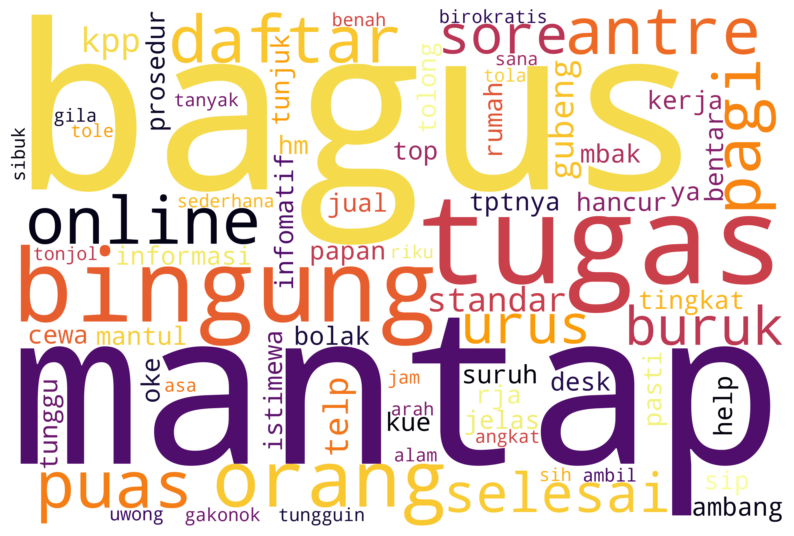

In [65]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
label = 'overall'  
text_data = df[df['Pemetaan'] == label]['Stemming']
all_words = ' '.join(text_data)
wordcloud = WordCloud(width=3000, height=2000, random_state=3, background_color='white',
                      colormap='inferno', collocations=False, stopwords=STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

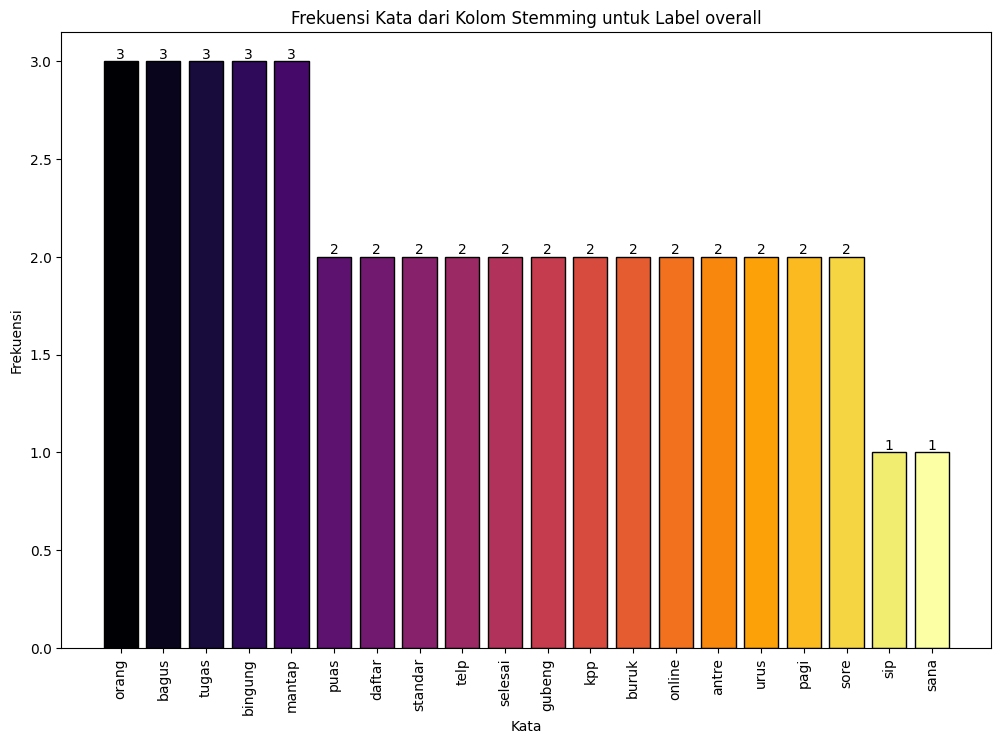

In [66]:
label = 'overall' 
text_data = ' '.join(df[df['Pemetaan'] == label]['Stemming'])
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text_data])
word_freq = X.toarray().flatten()
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

colormap = 'inferno'
num_bars = len(word_freq_df['Word'][:20])
colors = plt.get_cmap(colormap)(np.linspace(0, 1, num_bars))
plt.figure(figsize=(12, 8))
bars = plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20], color=colors, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title(f'Frekuensi Kata dari Kolom Stemming untuk Label {label}')
plt.xticks(rotation=90)
plt.show()

In [67]:
df_overall = df[df['Pemetaan'] == 'overall']
X = df_overall['Stemming']
y = df_overall['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

def class_accuracies(conf_matrix):
    true_positive = np.diag(conf_matrix)  
    total_per_class = np.sum(conf_matrix, axis=1) 
    accuracies = true_positive / total_per_class  
    return accuracies
accuracies = class_accuracies(cm)
for sentimen, acc in zip(model.classes_, accuracies):
    print(f'Akurasi Kelas {sentimen} SVM {label}: {acc * 100:.2f}%')
print(f"\nConfusion Matrix SVM {label}:\n", cm)

Akurasi Kelas Negatif SVM overall: 100.00%
Akurasi Kelas Positif SVM overall: 100.00%

Confusion Matrix SVM overall:
 [[3 0]
 [0 2]]


In [68]:
df_overall = df[df['Pemetaan'] == 'overall']
X = df_overall['Stemming']
y = df_overall['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

def class_accuracies(conf_matrix):
    true_positive = np.diag(conf_matrix)
    total_per_class = np.sum(conf_matrix, axis=1)
    accuracies = true_positive / total_per_class
    return accuracies
accuracies = class_accuracies(cm)
for sentimen, acc in zip(model.classes_, accuracies):
    print(f'Akurasi Kelas {sentimen} NB {label}]: {acc * 100:.2f}%')
print(f"\nConfusion Matrix NB {label}:\n", cm)

Akurasi Kelas Negatif NB overall]: 100.00%
Akurasi Kelas Positif NB overall]: 100.00%

Confusion Matrix NB overall:
 [[3 0]
 [0 2]]


#### _PERBANDINGAN_

In [69]:
cm_nb = np.array([[6, 5], [1, 12]])
cm_svm = np.array([[7, 4], [5, 8]])
labels = ['Negatif', 'Positif']

df_results = pd.DataFrame({
    'Label': ['Negatif', 'Negatif', 'Positif', 'Positif'],
    'Type': ['Actual', 'Prediction', 'Actual', 'Prediction'],
    'Naïve Bayes': [
        cm_nb[0].sum(),        cm_nb[:, 0].sum(),
        cm_nb[1].sum(),        cm_nb[:, 1].sum()    ],
    'SVM': [
        cm_svm[0].sum(),        cm_svm[:, 0].sum(),
        cm_svm[1].sum(),        cm_svm[:, 1].sum()    ]})
df_results 

,Label,Type,Naïve Bayes,SVM
0,Negatif,Actual,11,11
1,Negatif,Prediction,7,12
2,Positif,Actual,13,13
3,Positif,Prediction,17,12


In [70]:
data = {
    'Evaluasi': ['Akurasi', 'Presisi', 'Recall', 'F1-score'],
    'Naïve Bayes': [0.7500, 0.7714, 0.7500, 0.7556], #90
    'SVM': [0.7222, 0.7222, 0.7222, 0.7222] #70
}
evaluasi = pd.DataFrame(data)
evaluasi.set_index('Evaluasi', inplace=True)
evaluasi

,Naïve Bayes,SVM
Evaluasi,,
Akurasi,0.7500,0.7222
Presisi,0.7714,0.7222
Recall,0.7500,0.7222
F1-score,0.7556,0.7222


In [71]:
data = {
    'Label': ['Pelayanan', 'Tempat', 'Overall'],
    'NB Negatif': ['57.14%', '100%', '100%'],
    'NB Positif': ['90.91%', '0.00%', '100%']
}
df_akurasi = pd.DataFrame(data)
df_akurasi

,Label,NB Negatif,NB Positif
0,Pelayanan,57.14%,90.91%
1,Tempat,100%,0.00%
2,Overall,100%,100%


In [72]:
data = {
    'Label': ['Pelayanan', 'Tempat', 'Overall'],
    'SVM Negatif': ['100%', '100%', '100%'],
    'SVM Positif': ['90.91%', '0.00%', '100%']
}
df_akurasi = pd.DataFrame(data)
df_akurasi

,Label,SVM Negatif,SVM Positif
0,Pelayanan,100%,90.91%
1,Tempat,100%,0.00%
2,Overall,100%,100%
